In [ ]:
%%capture
# make sure compatible versions
# !pip install -r ../requirements.txt

### this notebook is to clean digital_marketing_campaign_dataset.csv , considering to be used for campaign optimsiation tasks

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib
import sklearn
import skimpy
from importlib.metadata import version

libraries = {
    "Python": sys.version,
    "pandas": pd.__version__,
    "numpy": np.__version__,
    "matplotlib": matplotlib.__version__,
    "seaborn": sns.__version__,
    "scikit-learn": sklearn.__version__,
    "skimpy": version("skimpy")
}

for lib, version in libraries.items():
    print(f"{lib:<17}: {version}")

Python           : 3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]
pandas           : 2.2.3
numpy            : 2.2.3
matplotlib       : 3.10.1
seaborn          : 0.13.2
scikit-learn     : 1.6.1
skimpy           : 0.0.18


### Load data

In [ ]:
data = pd.read_csv("../data/digital_marketing_campaign_dataset.csv")
data.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


### EDA

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 8000   │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 20     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA  ┃ NA % ┃ mean   ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID         │   0 │    0 │  12000 │    2310 │    8000 │   10000 │  12000 │  14000 │  16000 │ ▇▇▇▇▇▇ │  │
│ │ Age                │   0 │    0 │  43.63 │    14.9 │      18 │      31 │     43 │     56 │     69 │ ▇▇▇▇▇▇ │  │
│ │ Income             │   0 │    0 │  84660 │   37580 │   20010 │   51740 │  84930 │ 116800 │ 150000 │ ▇▇▇▇▇▇ │  │
│ │ AdSpend            │   0 │    0 │   5001 │    2838 │   100.1 │    2523 │   5013 │   7408 │   9998 │ ▇▇▇▇▇▇ │  │
│ │ ClickThroughRate   │   0 │    0 │ 0.1548 │ 0.08401 │    0.01 │ 0.08263 │ 0.1545 │ 0.2282 │    0.3 │ ▇▇▇▇▇▇ │  │
│ │ ConversionRate     │   0 │    0 │ 0.1044 │ 0.05488 │ 0.01002 │ 0.05641 │  0.104 │ 0.1521 │    0.2 │ ▇▇▇▇▇▇ │  │
│ │ WebsiteVisits      │   0 │    0 │  24.75 │   14.31 │       0 │      13 │     25 │     37 │     49 │ ▇▇▇▇▇▇ │  │
│ │ PagesPerVisit      │   0 │    0 │  5.549 │   2.607 │       1 │   3.302 │  5.534 │  7.836 │  9.999 │ ▇▇▇▇▇▇ │  │
│ │ TimeOnSite         │   0 │    0 │  7.728 │   4.228 │  0.5017 │   4.068 │  7.683 │  11.48 │     15 │ ▇▇▇▇▇▇ │  │
│ │ SocialShares       │   0 │    0 │   49.8 │    28.9 │       0 │      25 │     50 │     75 │     99 │ ▇▇▇▇▇▇ │  │
│ │ EmailOpens         │   0 │    0 │  9.477 │   5.711 │       0 │       5 │      9 │     14 │     19 │ ▇▆▇▆▆▇ │  │
│ │ EmailClicks        │   0 │    0 │  4.467 │   2.857 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ PreviousPurchases  │   0 │    0 │  4.486 │   2.888 │       0 │       2 │      4 │      7 │      9 │ ▇▃▇▃▇▇ │  │
│ │ LoyaltyPoints      │   0 │    0 │   2490 │    1430 │       0 │    1255 │   2497 │   3702 │   4999 │ ▇▇▇▇▇▇ │  │
│ │ Conversion         │   0 │    0 │ 0.8765 │   0.329 │       0 │       1 │      1 │      1 │      1 │ ▁    ▇ │  │
│ └────────────────────┴─────┴──────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                               │     0 │         0 │                        1 │                 8000 │  │
│ │ CampaignChannel                      │     0 │      

In [ ]:
data.dtypes

Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
WebsiteVisits          int64
PagesPerVisit        float64
TimeOnSite           float64
SocialShares           int64
EmailOpens             int64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object

In [ ]:
discrete_variables = ["Age", "WebsiteVisits", "SocialShares", "EmailOpens", "EmailClicks", "PreviousPurchases"]
continuous_variables = ["Income", "AdSpend", "ClickThroughRate", "ConversionRate", "PagesPerVisit", "TimeOnSite", "LoyaltyPoints"]
categorical_variables = ["Gender", "CampaignType", "Conversion"]

"AdvertisingPlatform" and "AdvertisingTool" dumb variables, "CustomerID" is useful, drop them

In [ ]:
data = data.drop(columns = ["AdvertisingPlatform", "AdvertisingTool", "CustomerID"])
data.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,1
1,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,1
2,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,1
3,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,1
4,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,1


In [ ]:
# Checking duplicate rows
print(f"Total duplicate rows: {data.duplicated().sum()}")

Total duplicate rows: 0


no duplicates and NA values in the data

In [ ]:
print("Class distribution in data:")
class_dist = data['Conversion'].value_counts()
print(class_dist)

Class distribution in data:
Conversion
1    7012
0     988
Name: count, dtype: int64


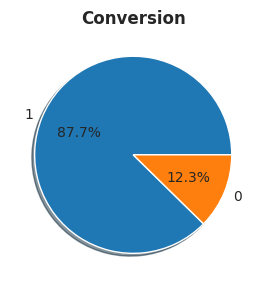

In [ ]:
plt.figure(figsize = (5, 3.2))
plt.pie(x = Counter(data["Conversion"]).values(), 
        labels = Counter(data["Conversion"]).keys(), 
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Conversion", fontsize = 12, fontweight = "bold")
plt.show()

highly imbalanced data, oversampling methods should be applied

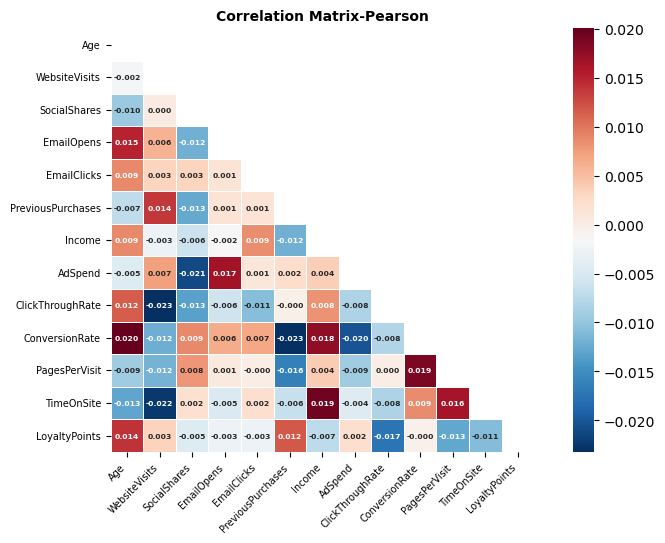

In [ ]:
corr_matrix_pearson = data[discrete_variables + continuous_variables].corr(method = 'pearson')
mask = np.triu(np.ones_like(corr_matrix_pearson, dtype = bool))

fig,ax = plt.subplots(figsize = (10, 5.5))
sns.heatmap(corr_matrix_pearson, 
            annot = True, 
            annot_kws = {'fontsize':5.5, 'fontweight':'bold'},
            fmt = '.3f',
            linewidths = 0.6,
            cmap = 'RdBu_r', 
            mask = mask, 
            square = True,
            ax = ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
ax.tick_params(labelsize = 7, labelcolor = 'black')
ax.set_title("Correlation Matrix-Pearson", fontsize = 10, fontweight = 'bold', color = 'black')
fig.show()

no observable correlated features

### Pre-processing

In [ ]:
X = data.drop('Conversion', axis = 1)
y = data['Conversion']

SEED = 42
TEST_SIZE = 0.2 # 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = SEED, 
                                                    stratify = y)

print(f"X_train: {len(y_train)} samples")
print(f"X_test: {len(y_test)} samples")

X_train: 6400 samples
X_test: 1600 samples


In [ ]:
print(Counter(y_train))
print(Counter(y_test))

Counter({1: 5610, 0: 790})
Counter({1: 1402, 0: 198})


In [ ]:
X_train.head()

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
2787,26,Female,131794,Social Media,Retention,7562.712158,0.287815,0.127689,35,4.265172,12.332071,42,17,0,5,1261
7093,53,Male,64280,Social Media,Retention,5623.440404,0.023705,0.074578,40,8.998052,12.793125,69,6,0,4,3655
6379,56,Female,119826,Email,Retention,313.985706,0.021176,0.156016,45,7.061957,5.519560,20,16,4,6,4932
3865,54,Female,91019,Social Media,Retention,6876.065933,0.219177,0.064783,29,7.690586,14.105224,91,6,8,8,1960
1167,25,Female,63167,Email,Consideration,2069.226733,0.048545,0.177755,8,8.353003,1.628300,73,8,9,6,2189


In [ ]:
categorical_features = X_train.select_dtypes(include = ['object', 'category']).columns.to_list()
numerical_features = continuous_variables + discrete_variables

In [ ]:
le = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
transformers = [('le', le, categorical_features)]
preprocessor = ColumnTransformer(transformers, 
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
preprocessor.set_output(transform='pandas')

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)
X_train_prep.head()

,Gender,CampaignChannel,CampaignType,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints
2787,0.0,4.0,3.0,26,131794,7562.712158,0.287815,0.127689,35,4.265172,12.332071,42,17,0,5,1261
7093,1.0,4.0,3.0,53,64280,5623.440404,0.023705,0.074578,40,8.998052,12.793125,69,6,0,4,3655
6379,0.0,0.0,3.0,56,119826,313.985706,0.021176,0.156016,45,7.061957,5.519560,20,16,4,6,4932
3865,0.0,4.0,3.0,54,91019,6876.065933,0.219177,0.064783,29,7.690586,14.105224,91,6,8,8,1960
1167,0.0,0.0,1.0,25,63167,2069.226733,0.048545,0.177755,8,8.353003,1.628300,73,8,9,6,2189


In [ ]:
# Print the label mappings for each categorical feature
encoder = preprocessor.named_transformers_['le']
categories = encoder.categories_

for i, feature_name in enumerate(categorical_features):
    print(f"\nFeature: {feature_name}")
    for j, category in enumerate(categories[i]):
        print(f"  {category} → {j}")


Feature: Gender
  Female → 0
  Male → 1

Feature: CampaignChannel
  Email → 0
  PPC → 1
  Referral → 2
  SEO → 3
  Social Media → 4

Feature: CampaignType
  Awareness → 0
  Consideration → 1
  Conversion → 2
  Retention → 3
